# Lakshita Sethi
## 21BDA54
## ML_Lab03

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor

In [2]:
sns.set(style = 'darkgrid')
sns.set(rc={'figure.figsize':(15,12)})

In [3]:
df = pd.read_csv("breast_cancer.csv",sep = ",")

In [4]:
df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,15-Jan-17,19-Jun-17,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,26-Apr-17,09-Nov-18,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,08-Sep-17,09-Jun-18,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,25-Jan-17,12-Jul-17,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,06-May-17,27-Jun-19,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,TCGA-AN-A04A,36,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,11-Nov-19,09-Feb-20,Dead
330,TCGA-A8-A085,44,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,01-Nov-19,04-Mar-20,Dead
331,TCGA-A1-A0SG,61,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,11-Nov-19,18-Jan-21,Dead
332,TCGA-A2-A0EU,79,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,21-Nov-19,19-Feb-21,Dead


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Patient_ID          334 non-null    object 
 1   Age                 334 non-null    int64  
 2   Gender              334 non-null    object 
 3   Protein1            334 non-null    float64
 4   Protein2            334 non-null    float64
 5   Protein3            334 non-null    float64
 6   Protein4            334 non-null    float64
 7   Tumour_Stage        334 non-null    object 
 8   Histology           334 non-null    object 
 9   ER status           334 non-null    object 
 10  PR status           334 non-null    object 
 11  HER2 status         334 non-null    object 
 12  Surgery_type        334 non-null    object 
 13  Date_of_Surgery     334 non-null    object 
 14  Date_of_Last_Visit  317 non-null    object 
 15  Patient_Status      321 non-null    object 
dtypes: float

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,334.0,58.886228,12.961212,29.00000,49.000000,58.000000,68.000000,90.0000
Protein1,334.0,-0.029991,0.563588,-2.34090,-0.358888,0.006129,0.343598,1.5936
Protein2,334.0,0.946896,0.911637,-0.97873,0.362173,0.992805,1.627900,3.4022
Protein3,334.0,-0.090204,0.585175,-1.62740,-0.513748,-0.173180,0.278353,2.1934
Protein4,334.0,0.009819,0.629055,-2.02550,-0.377090,0.041768,0.425630,1.6299


In [7]:
df.isna().sum()

Patient_ID             0
Age                    0
Gender                 0
Protein1               0
Protein2               0
Protein3               0
Protein4               0
Tumour_Stage           0
Histology              0
ER status              0
PR status              0
HER2 status            0
Surgery_type           0
Date_of_Surgery        0
Date_of_Last_Visit    17
Patient_Status        13
dtype: int64

In [8]:
df.shape

(334, 16)

In [9]:
# Converting the object format to datetime format wherever required.

In [10]:
df["Date_of_Surgery"] = pd.to_datetime(df["Date_of_Surgery"])

In [11]:
df["Date_of_Last_Visit"] = pd.to_datetime(df["Date_of_Last_Visit"])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 334 entries, 0 to 333
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Patient_ID          334 non-null    object        
 1   Age                 334 non-null    int64         
 2   Gender              334 non-null    object        
 3   Protein1            334 non-null    float64       
 4   Protein2            334 non-null    float64       
 5   Protein3            334 non-null    float64       
 6   Protein4            334 non-null    float64       
 7   Tumour_Stage        334 non-null    object        
 8   Histology           334 non-null    object        
 9   ER status           334 non-null    object        
 10  PR status           334 non-null    object        
 11  HER2 status         334 non-null    object        
 12  Surgery_type        334 non-null    object        
 13  Date_of_Surgery     334 non-null    datetime64[ns]

In [13]:
df.nunique()

Patient_ID            334
Age                    57
Gender                  2
Protein1              333
Protein2              334
Protein3              334
Protein4              333
Tumour_Stage            3
Histology               3
ER status               1
PR status               1
HER2 status             2
Surgery_type            4
Date_of_Surgery       181
Date_of_Last_Visit    285
Patient_Status          2
dtype: int64

In [14]:
df.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,TCGA-D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive
1,TCGA-EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead
2,TCGA-A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2018-06-09,Alive
3,TCGA-D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-07-12,Alive
4,TCGA-BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,2019-06-27,Dead


In [15]:
df['Patient_ID'] = df['Patient_ID'].astype(str).apply(lambda x: x[5:])

In [16]:
df

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Tumour_Stage,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Patient_Status
0,D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,Alive
1,EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,II,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,Dead
2,A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,III,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2018-06-09,Alive
3,D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-07-12,Alive
4,BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,2019-06-27,Dead
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
329,AN-A04A,36,FEMALE,0.231800,0.61804,-0.55779,-0.517350,III,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Simple Mastectomy,2019-11-11,2020-02-09,Dead
330,A8-A085,44,MALE,0.732720,1.11170,-0.26952,-0.354920,II,Infiltrating Lobular Carcinoma,Positive,Positive,Negative,Other,2019-11-01,2020-03-04,Dead
331,A1-A0SG,61,FEMALE,-0.719470,2.54850,-0.15024,0.339680,II,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Lumpectomy,2019-11-11,2021-01-18,Dead
332,A2-A0EU,79,FEMALE,0.479400,2.05590,-0.53136,-0.188480,I,Infiltrating Ductal Carcinoma,Positive,Positive,Positive,Lumpectomy,2019-11-21,2021-02-19,Dead


In [17]:
df.dropna(inplace = True)

In [18]:
df.isna().sum()

Patient_ID            0
Age                   0
Gender                0
Protein1              0
Protein2              0
Protein3              0
Protein4              0
Tumour_Stage          0
Histology             0
ER status             0
PR status             0
HER2 status           0
Surgery_type          0
Date_of_Surgery       0
Date_of_Last_Visit    0
Patient_Status        0
dtype: int64

In [19]:
df.shape

(317, 16)

## Analysis

In [20]:
df["Age"].value_counts()

59    15
63    14
54    13
56    12
50    12
46    11
53    10
68    10
62    10
45     9
51     9
49     9
61     8
47     8
66     8
52     8
60     8
77     8
48     7
65     6
57     6
58     6
74     6
41     6
71     6
64     6
42     5
40     5
76     5
79     5
44     4
78     4
85     4
84     4
39     3
80     3
38     3
73     3
36     3
55     3
43     3
75     3
72     3
69     3
67     2
82     2
83     2
70     2
87     2
37     2
29     2
35     1
90     1
89     1
32     1
81     1
88     1
Name: Age, dtype: int64

In [21]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [22]:
df["Gender"].value_counts()

FEMALE    313
MALE        4
Name: Gender, dtype: int64

In [23]:
df["Protein1"].value_counts()

 0.000000    2
 0.080353    1
 0.786010    1
-0.576750    1
 0.187620    1
            ..
 0.059398    1
-0.467130    1
-0.523030    1
 0.373550    1
-0.244270    1
Name: Protein1, Length: 316, dtype: int64

In [24]:
df["Tumour_Stage"].value_counts()

II     180
III     77
I       60
Name: Tumour_Stage, dtype: int64

In [25]:
df["Histology"].value_counts()

Infiltrating Ductal Carcinoma     224
Infiltrating Lobular Carcinoma     81
Mucinous Carcinoma                 12
Name: Histology, dtype: int64

In [26]:
df["ER status"].value_counts()

Positive    317
Name: ER status, dtype: int64

In [27]:
df["PR status"].value_counts()

Positive    317
Name: PR status, dtype: int64

In [28]:
df["HER2 status"].value_counts()

Negative    288
Positive     29
Name: HER2 status, dtype: int64

In [29]:
df["Surgery_type"].value_counts()

Other                          97
Modified Radical Mastectomy    89
Lumpectomy                     66
Simple Mastectomy              65
Name: Surgery_type, dtype: int64

In [30]:
df["Patient_Status"].value_counts()

Alive    255
Dead      62
Name: Patient_Status, dtype: int64

In [31]:
df.corr()

,Age,Protein1,Protein2,Protein3,Protein4
Age,1.000000,-0.044541,-0.011387,-0.047362,0.095417
Protein1,-0.044541,1.000000,0.223093,-0.103046,0.259171
Protein2,-0.011387,0.223093,1.000000,-0.407670,0.084939
Protein3,-0.047362,-0.103046,-0.407670,1.000000,0.076759
Protein4,0.095417,0.259171,0.084939,0.076759,1.000000


In [32]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

<AxesSubplot:xlabel='Histology', ylabel='Age'>

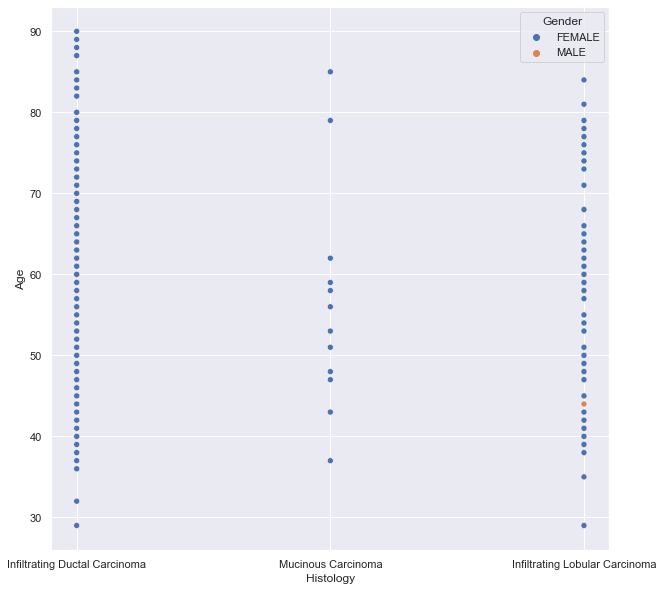

In [33]:
plt.figure(figsize = (10,10))
p = sns.scatterplot(x = "Histology",y = "Age",hue = "Gender",data = df)
p

<AxesSubplot:xlabel='Protein1', ylabel='Protein2'>

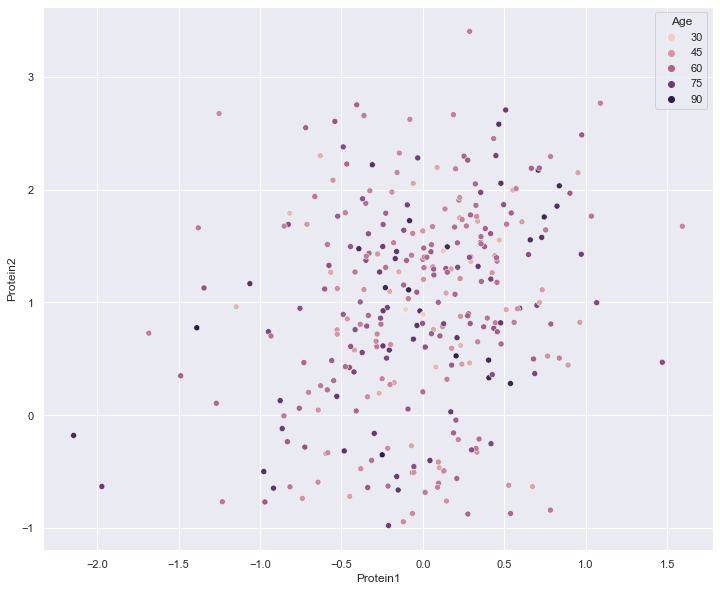

In [34]:
plt.figure(figsize = (12,10))
sns.scatterplot(x = "Protein1",y = "Protein2",hue = "Age",data = df)

<AxesSubplot:xlabel='Protein1', ylabel='Protein2'>

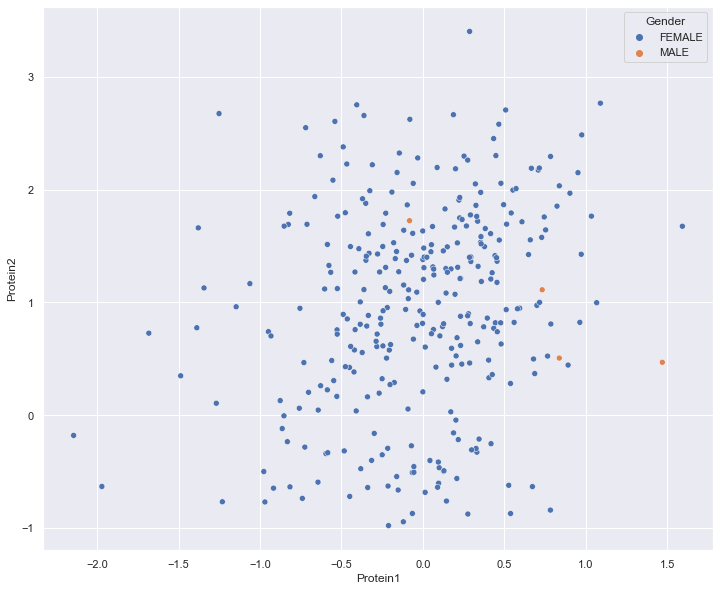

In [35]:
plt.figure(figsize = (12,10))
sns.scatterplot(x = "Protein1",y = "Protein2",hue = "Gender",data = df)

<AxesSubplot:xlabel='Age', ylabel='Protein1'>

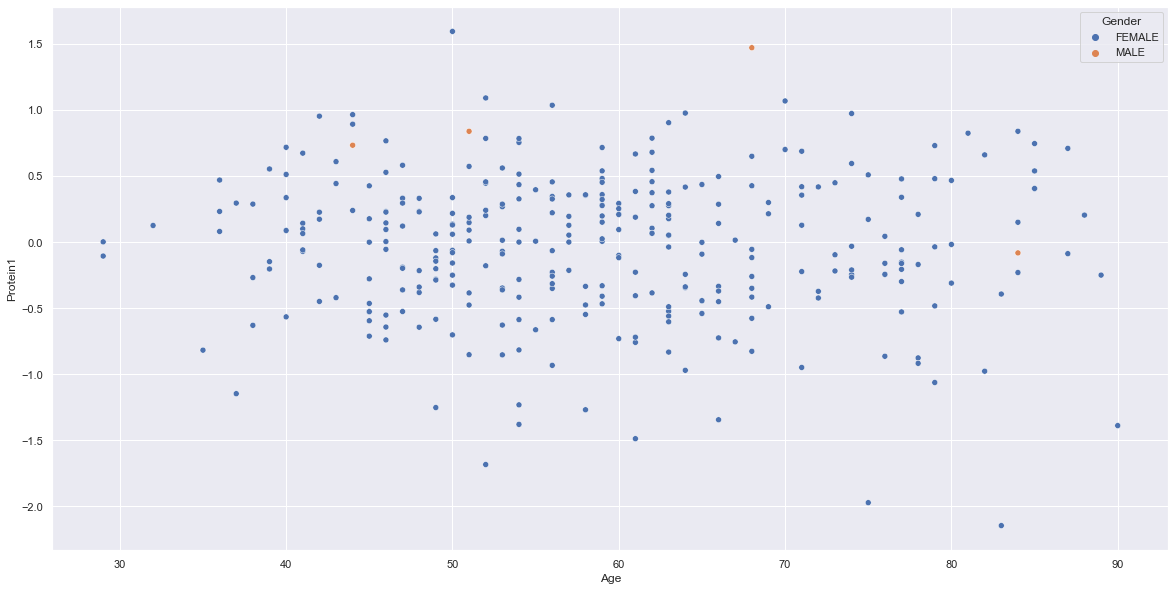

In [36]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = "Age",y = "Protein1",hue = "Gender",data = df)

In [37]:
# The value of the Protein1 lies b/w -1 and 1 mostly b/w the age groups 40 to 70.

<AxesSubplot:xlabel='Age', ylabel='Protein2'>

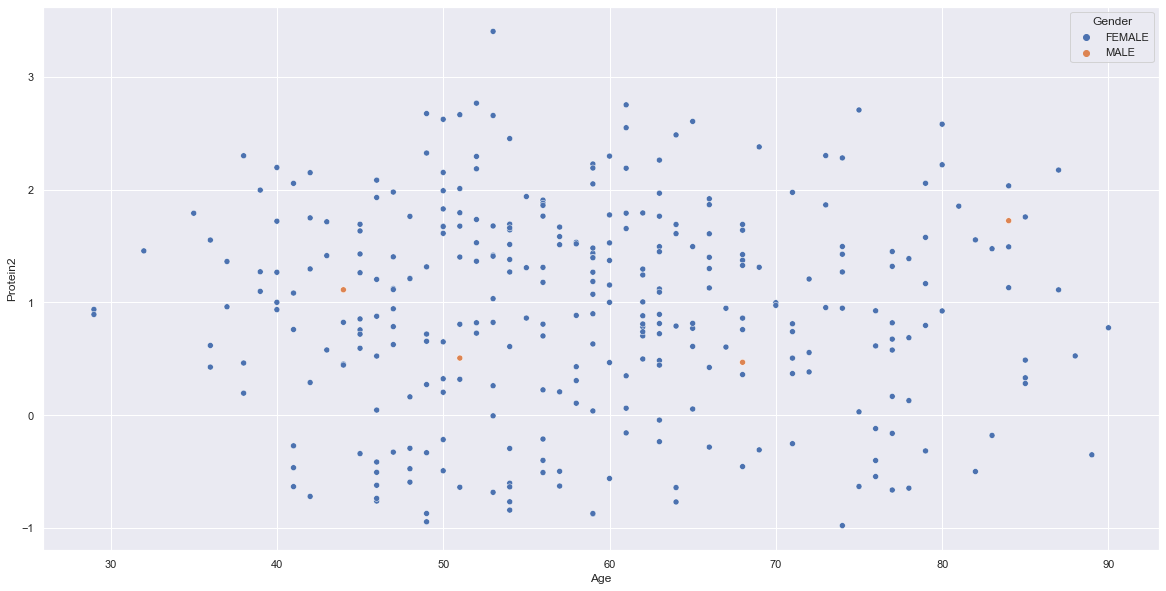

In [38]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = "Age",y = "Protein2",hue = "Gender",data = df)

<AxesSubplot:xlabel='Age', ylabel='Protein3'>

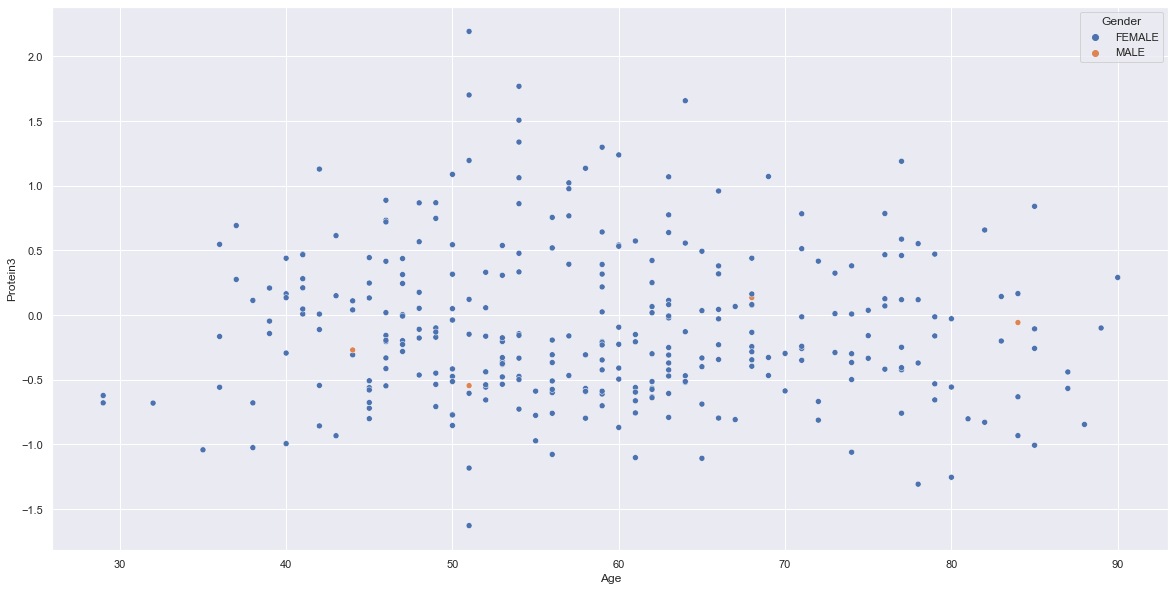

In [39]:
plt.figure(figsize = (20,10))
sns.scatterplot(x = "Age",y = "Protein3",hue = "Gender",data = df)

<Figure size 1440x720 with 0 Axes>

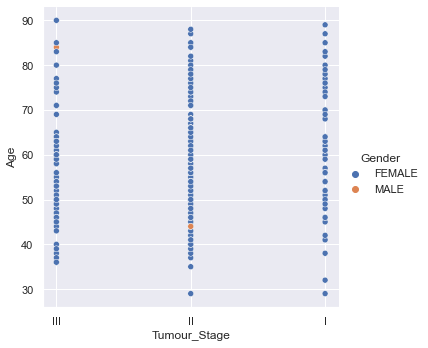

In [40]:
plt.figure(figsize = (20,10))
sns.relplot(x = "Tumour_Stage",y = "Age",hue = "Gender",data = df)

In [41]:
df.groupby("Gender")["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Gender,,,,,,,,
FEMALE,313.0,58.686901,12.784370,29.0,49.00,58.0,67.0,90.0
MALE,4.0,61.750000,17.932745,44.0,49.25,59.5,72.0,84.0


In [42]:
# Average age that females's get breast cancer is 58 years. 
# We can further vizualise this.

<AxesSubplot:xlabel='Gender', ylabel='Age'>

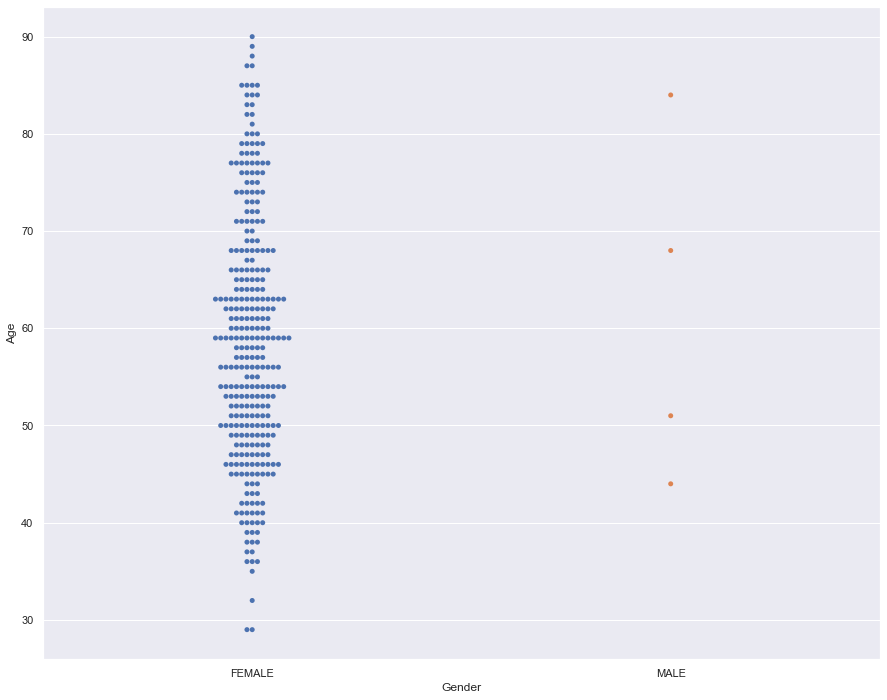

In [43]:
sns.swarmplot(x = "Gender",y = "Age",data = df)

In [44]:
# Hence we can see that the females of age approximately equal to 59 years, are most likely to get breast cancer.

In [45]:
df.groupby(["Gender","Patient_Status"])["Age"].mean()

Gender  Patient_Status
FEMALE  Alive             58.698413
        Dead              58.639344
MALE    Alive             67.666667
        Dead              44.000000
Name: Age, dtype: float64

In [46]:
# Average age  of 

<AxesSubplot:xlabel='Patient_Status', ylabel='Age'>

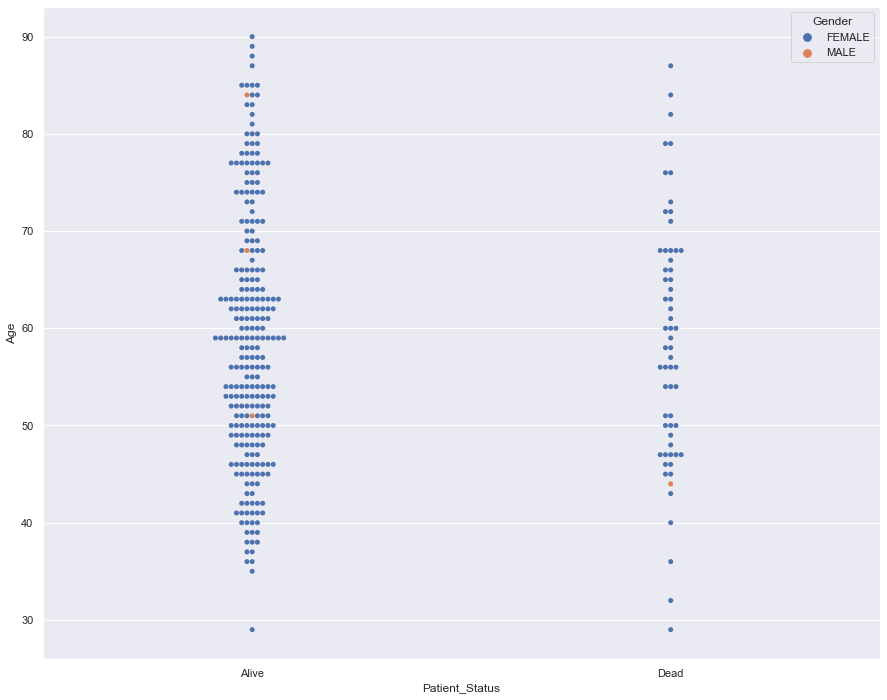

In [47]:
sns.swarmplot(x = "Patient_Status", y = "Age",hue = "Gender",data = df)

<AxesSubplot:xlabel='Gender', ylabel='Age'>

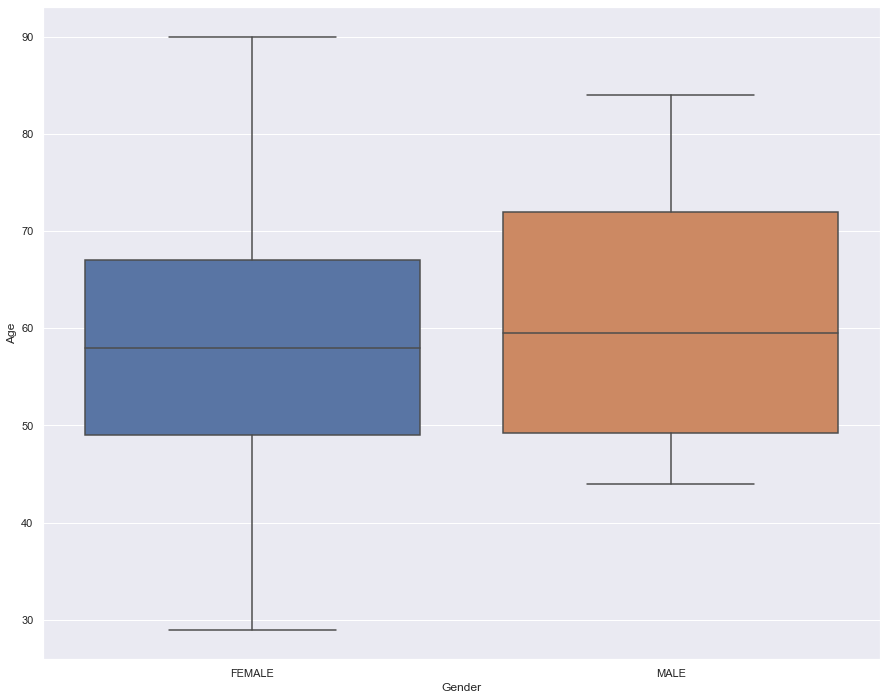

In [48]:
sns.boxplot(x = "Gender",y="Age",data = df)

In [49]:
df.groupby(["Tumour_Stage","Patient_Status"])["Age"].count()

Tumour_Stage  Patient_Status
I             Alive              51
              Dead                9
II            Alive             144
              Dead               36
III           Alive              60
              Dead               17
Name: Age, dtype: int64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Tumour_Stage', ylabel='count'>

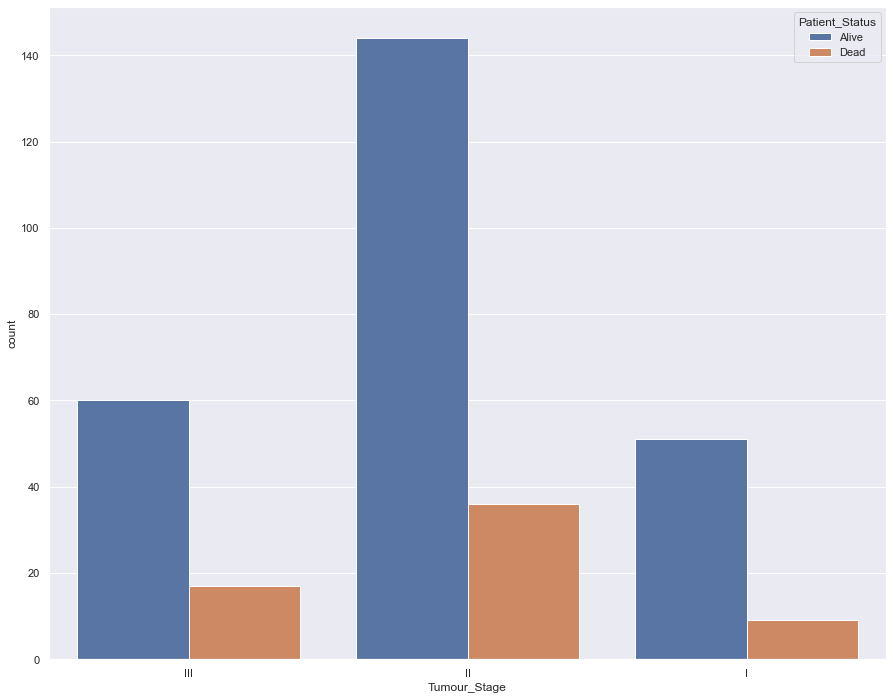

In [50]:
sns.countplot("Tumour_Stage",data = df,hue = "Patient_Status")

In [130]:
df.groupby(["Age","Tumour_Stage"])["Patient_Status"].count().sample(20)

Age  Tumour_Stage
49   I               1
66   II              8
63   III             4
58   II              3
85   II              2
39   II              2
59   I               1
82   II              1
42   II              4
35   II              1
38   III             1
80   II              1
61   III             2
40   III             1
51   I               1
49   III             5
64   I               3
79   I               1
46   II              5
80   III             1
Name: Patient_Status, dtype: int64

In [52]:
#The maximum number of patients of breast cancer are observed to be in the II stage according to our data.

<AxesSubplot:xlabel='Age', ylabel='Protein1'>

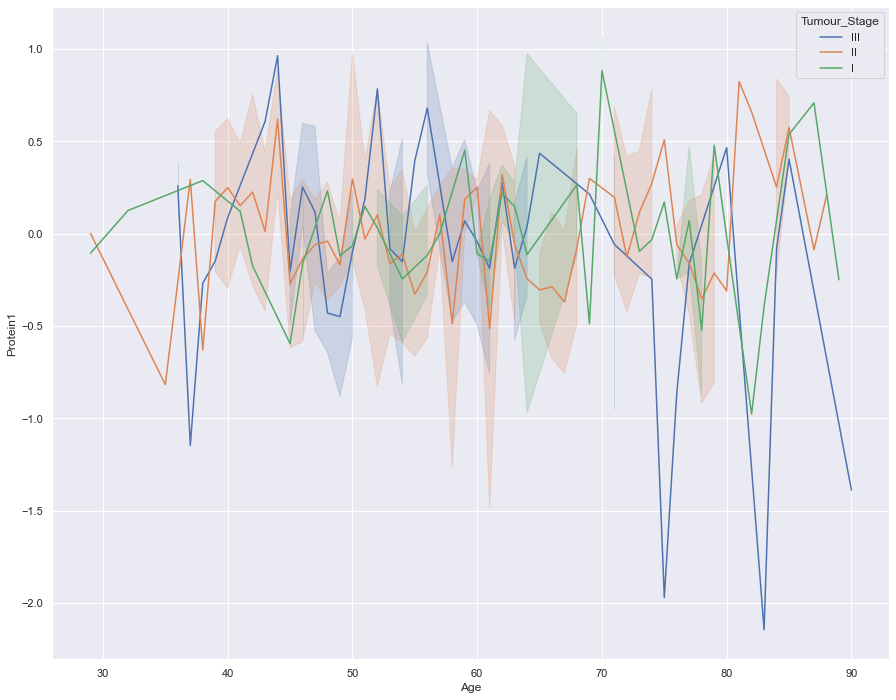

In [53]:
sns.lineplot(x = "Age",y = "Protein1", hue = "Tumour_Stage",data = df)

In [54]:
# We can see that in Tumour_Stage = III, at the age of above 70 years, there is a quick drop in the level of "Protein1".

<AxesSubplot:xlabel='Age', ylabel='Protein2'>

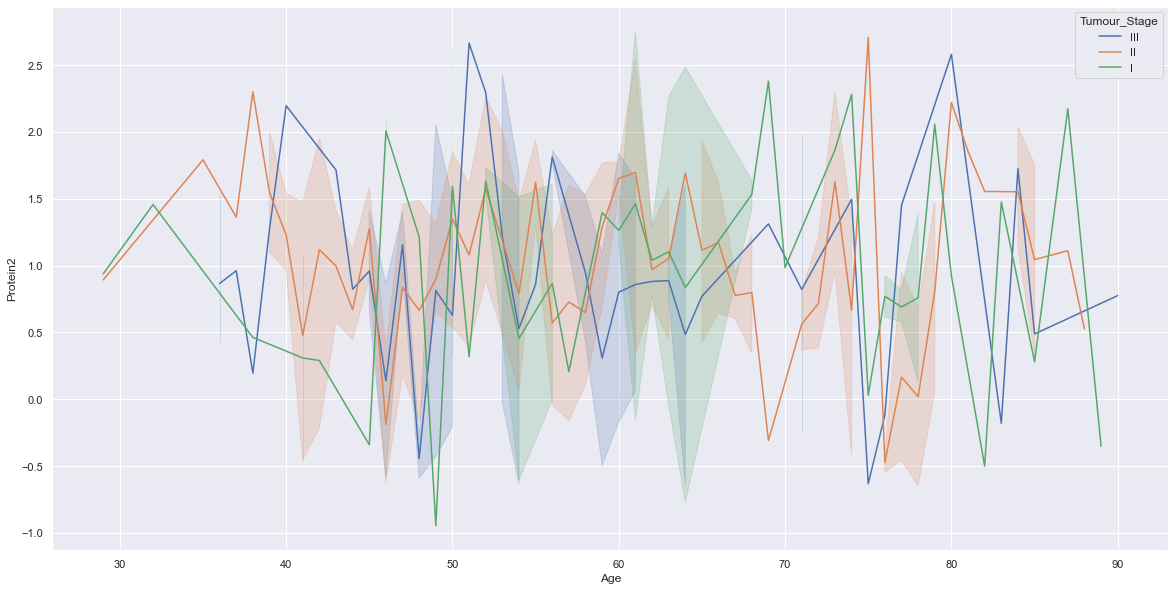

In [55]:
plt.figure(figsize = (20,10))
sns.lineplot(x = "Age",y = "Protein2", hue = "Tumour_Stage",data = df)

In [125]:
# We can see that in Tumour_Stage = III, for the age groups of 60 to 75, there isn't much change in the value of Protein2.
# But mostly the value of Protein2 varies a lot in the case of tumour_Stage = III.

<AxesSubplot:xlabel='Age', ylabel='Protein3'>

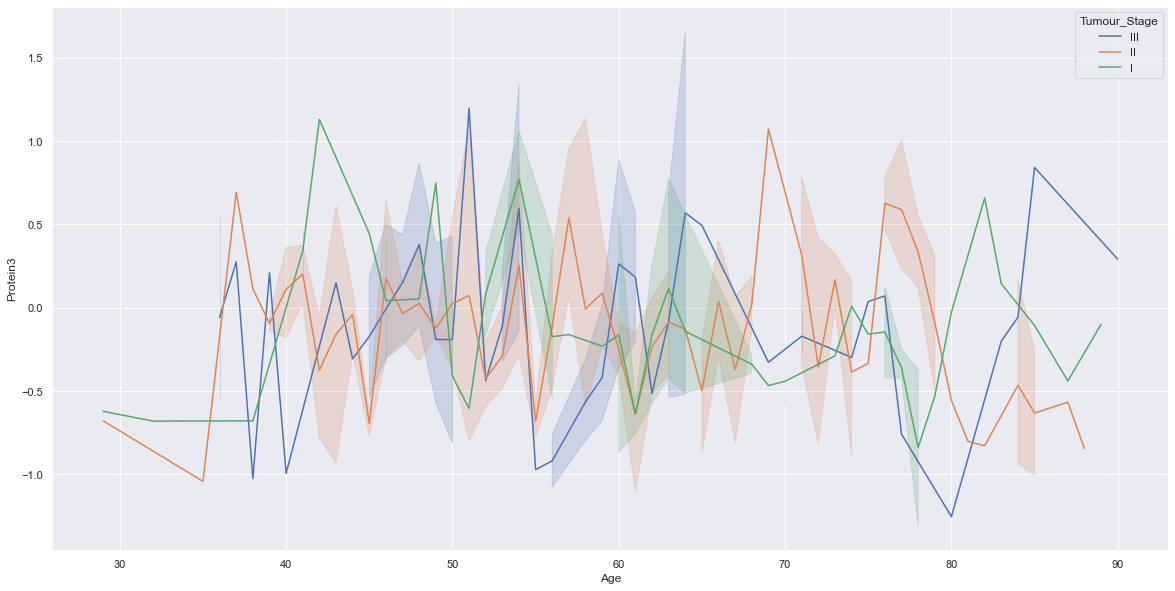

In [56]:
plt.figure(figsize = (20,10))
sns.lineplot(x = "Age",y = "Protein3", hue = "Tumour_Stage",data = df)

<AxesSubplot:xlabel='Age', ylabel='Protein4'>

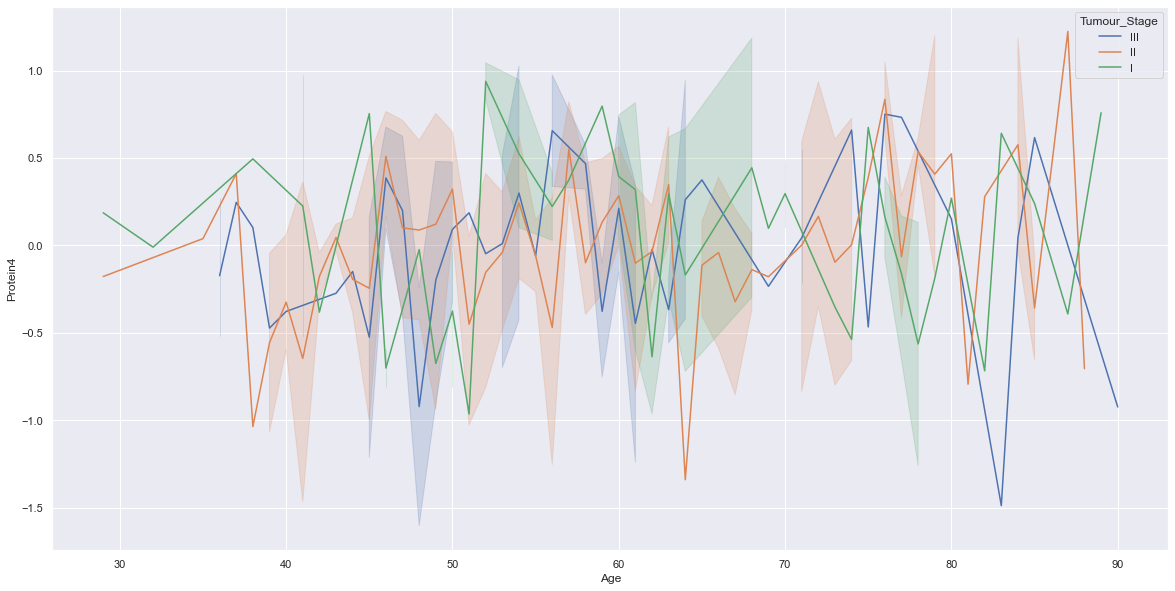

In [57]:
plt.figure(figsize = (20,10))
sns.lineplot(x = "Age",y = "Protein4", hue = "Tumour_Stage",data = df)

#### It can be observed from the above three graphs, that the patients of age groups 45 to 65 and after 75, the Protein levels are highly varying. That might be a reason for more death of that age group people.

In [58]:
df.corr()

,Age,Protein1,Protein2,Protein3,Protein4
Age,1.000000,-0.044541,-0.011387,-0.047362,0.095417
Protein1,-0.044541,1.000000,0.223093,-0.103046,0.259171
Protein2,-0.011387,0.223093,1.000000,-0.407670,0.084939
Protein3,-0.047362,-0.103046,-0.407670,1.000000,0.076759
Protein4,0.095417,0.259171,0.084939,0.076759,1.000000


In [59]:
df.Gender.value_counts(normalize=True)

FEMALE    0.987382
MALE      0.012618
Name: Gender, dtype: float64

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:1210: UserWarning: No contour levels were found within the data range.
  cset = contour_func(


<AxesSubplot:xlabel='Age', ylabel='Date_of_Surgery'>

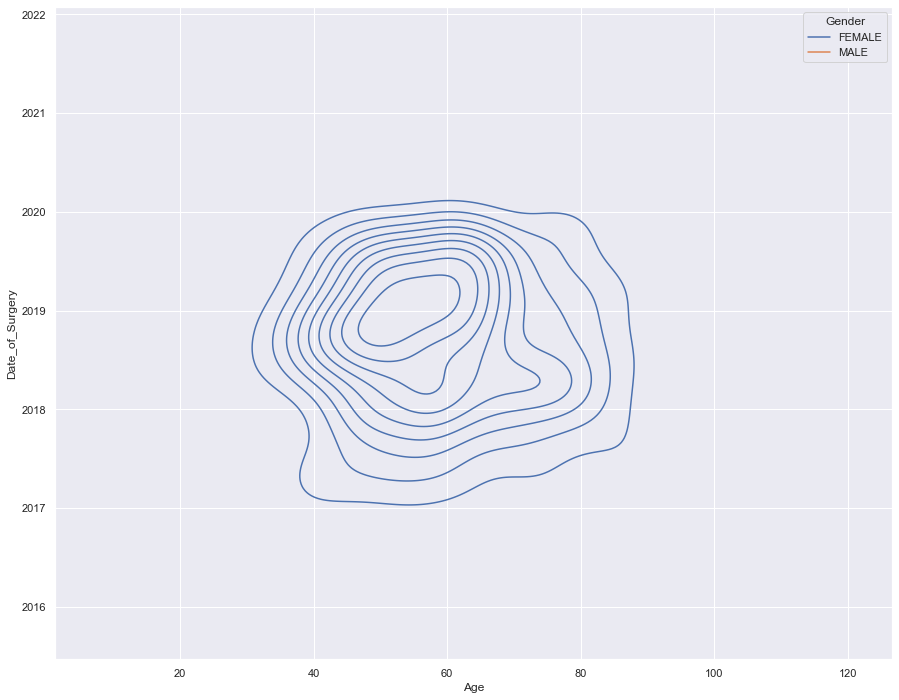

In [60]:
sns.kdeplot(
    data=df,
    x="Age",
    y='Date_of_Surgery',
    hue="Gender",
    thresh=.1,
)

## Building Logistic Regression Model

In [61]:
df.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Tumour_Stage', 'Histology', 'ER status', 'PR status',
       'HER2 status', 'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Patient_Status'],
      dtype='object')

In [62]:
model_df = df[['Age', 'Gender', 'Protein1', 'Protein2', 'Protein3','Protein4','Date_of_Surgery', 'Date_of_Last_Visit','Patient_Status']]

In [63]:
y = model_df.Patient_Status

In [64]:
df1 = pd.get_dummies(data=df, columns=['Tumour_Stage', 'Patient_Status'], drop_first=True)

In [65]:
df1.head()

,Patient_ID,Age,Gender,Protein1,Protein2,Protein3,Protein4,Histology,ER status,PR status,HER2 status,Surgery_type,Date_of_Surgery,Date_of_Last_Visit,Tumour_Stage_II,Tumour_Stage_III,Patient_Status_Dead
0,D8-A1XD,36,FEMALE,0.080353,0.42638,0.54715,0.273680,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-15,2017-06-19,0,1,0
1,EW-A1OX,43,FEMALE,-0.420320,0.57807,0.61447,-0.031505,Mucinous Carcinoma,Positive,Positive,Negative,Lumpectomy,2017-04-26,2018-11-09,1,0,1
2,A8-A079,69,FEMALE,0.213980,1.31140,-0.32747,-0.234260,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-09-08,2018-06-09,0,1,0
3,D8-A1XR,56,FEMALE,0.345090,-0.21147,-0.19304,0.124270,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Modified Radical Mastectomy,2017-01-25,2017-07-12,1,0,0
4,BH-A0BF,56,FEMALE,0.221550,1.90680,0.52045,-0.311990,Infiltrating Ductal Carcinoma,Positive,Positive,Negative,Other,2017-05-06,2019-06-27,1,0,1


In [66]:
df1.columns

Index(['Patient_ID', 'Age', 'Gender', 'Protein1', 'Protein2', 'Protein3',
       'Protein4', 'Histology', 'ER status', 'PR status', 'HER2 status',
       'Surgery_type', 'Date_of_Surgery', 'Date_of_Last_Visit',
       'Tumour_Stage_II', 'Tumour_Stage_III', 'Patient_Status_Dead'],
      dtype='object')

In [67]:
df1.corr()

,Age,Protein1,Protein2,Protein3,Protein4,Tumour_Stage_II,Tumour_Stage_III,Patient_Status_Dead
Age,1.000000,-0.044541,-0.011387,-0.047362,0.095417,0.006663,-0.114225,-0.012410
Protein1,-0.044541,1.000000,0.223093,-0.103046,0.259171,0.039666,-0.062212,-0.019805
Protein2,-0.011387,0.223093,1.000000,-0.407670,0.084939,0.028820,-0.054752,0.074810
Protein3,-0.047362,-0.103046,-0.407670,1.000000,0.076759,0.036896,-0.006207,0.025305
Protein4,0.095417,0.259171,0.084939,0.076759,1.000000,-0.002663,-0.036937,0.074876
Tumour_Stage_II,0.006663,0.039666,0.028820,0.036896,-0.002663,1.000000,-0.649256,0.012763
Tumour_Stage_III,-0.114225,-0.062212,-0.054752,-0.006207,-0.036937,-0.649256,1.000000,0.035980
Patient_Status_Dead,-0.012410,-0.019805,0.074810,0.025305,0.074876,0.012763,0.035980,1.000000


In [97]:
X = df1[['Age']]
Y = df1['Tumour_Stage_II']

In [98]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.20,random_state = 42)

In [99]:
d = LogisticRegression(random_state=0)

In [100]:
d.fit(X_train, Y_train)

LogisticRegression(random_state=0)

In [101]:
d.predict(X_test)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

In [102]:
d.score(X_train, Y_train)

0.541501976284585

In [103]:
d.score(X_test, Y_test)

0.671875

In [104]:
predicted = d.predict(X_test)

In [105]:
predicted

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

In [106]:
from sklearn.metrics import classification_report , confusion_matrix
print( confusion_matrix (Y_test , predicted))

[[ 0 21]
 [ 0 43]]


## Evaluation of our model by finding certain matrices

### a. Confusion Matrix

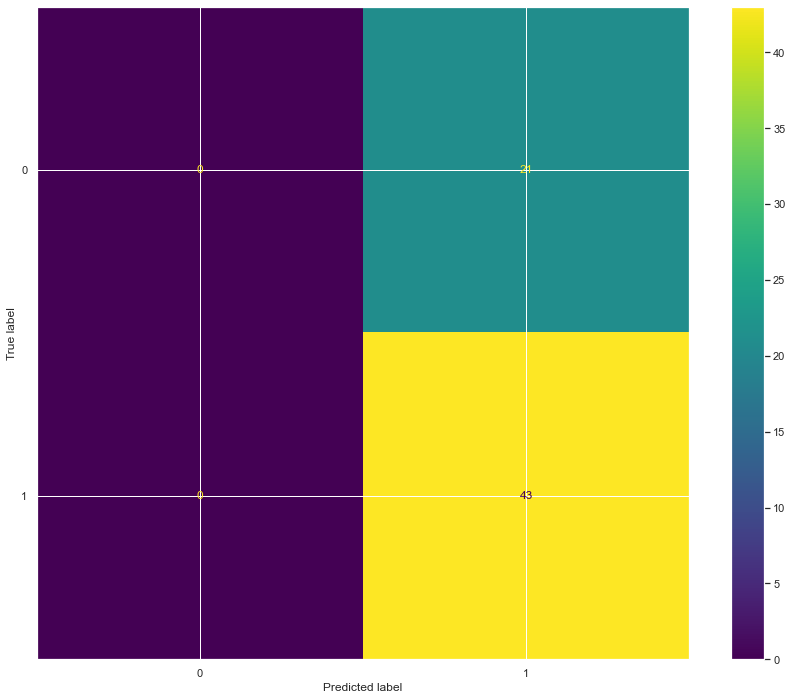

In [107]:
confusion_mat = metrics.confusion_matrix(Y_test,predicted)
matrix = metrics.ConfusionMatrixDisplay(confusion_matrix=confusion_mat,display_labels=d.classes_)
matrix.plot()

In [108]:
# True Positive is when it's actually true and our model also shows that it's true.
# False Positive is when the value is actually false but our model shows that it's true.
# True Negative is when the value is actually negative and our model also returns the same.
# False Negative is when the value is actually positive but  our model returns that it's negative.

In [109]:
tn, fp, fn, tp = metrics.confusion_matrix(Y_test, predicted).ravel() # calculating the confusion matrix

In [110]:
# Confusion matrix vizualizes and summarizes the performance of a classification algorithm.

### b. Precision

In [122]:
Precision = metrics.precision_score(Y_test,predicted)
print (Precision)

0.671875


#### Precision tells us what proportion of positive identifications was actually correct.

### c. Recall

In [121]:
sensitivity = metrics.recall_score(Y_test,predicted)
print (sensitivity)

1.0


#### Recall tells us what proportion of actual positives was identified correctly.

### d. F1- Score

In [113]:
F1_Score = metrics.f1_score(Y_test,predicted)
print (F1_Score)

0.8037383177570093


#### It is primarily used to compare the performance of two classifiers. It actually combines both the precision and recall values. 

### e. Specificity

In [114]:
Specificity = (tn) / (tn+fp)
print (Specificity)

0.0


#### Specificity gives us the percentage of correctly identified True Negative values.

### f. Sensitivity

In [115]:
sensitivity = (tp)/(tp+fn)
print (sensitivity)

1.0


#### The model can correctly classify positive values. In simple terms, when the actual class is True, then sensitivity gives us the percentage of how often our model tests it True.

In [123]:
# Reference: https://ebn.bmj.com/content/23/1/2

### g. Misclassification Rate

In [116]:
error_rate_using_sklearn = 1-metrics.accuracy_score(Y_test,predicted)
print (error_rate_using_sklearn)

0.328125


#### Our above classification model made a prediction of 32.81% of the incorrect predicted values.

In [ ]:
# Reference: https://www.statology.org/misclassification-rate/#:~:text=In%20machine%20learning%2C%20misclassification%20rate,%23%20incorrect%20predictions%20%2F%20%23%20total%20predictions

### h. ROC, AUROC

### ROC curve stands Receiver Operating Characteristics Curve

Text(0.5, 0, 'False positive rate')

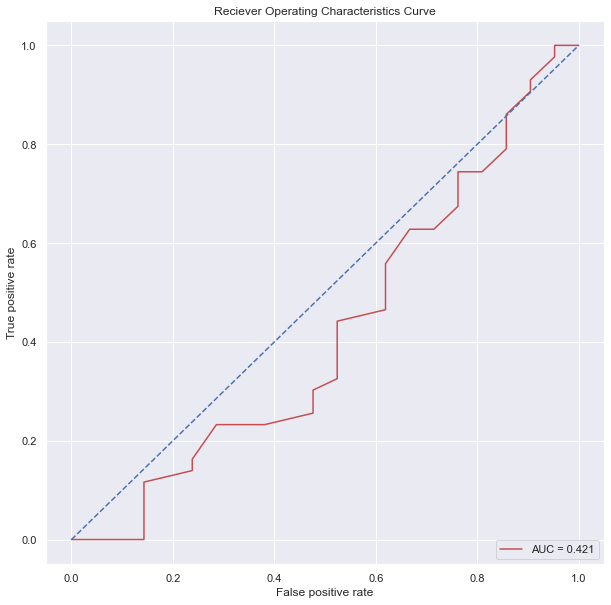

In [118]:
plot = plt.figure(figsize = (10,10))
frp,trp, threshold = roc_curve(Y_test,d.predict_proba(X_test)[:,1])
roc_auc_ = auc(frp,trp)
plt.title('Reciever Operating Characteristics Curve')
plt.plot(frp,trp,'r',label = 'AUC = %0.3f' % roc_auc_)
plt.legend(loc='lower right')
plt.plot([0,1],[0,1],'b--')
plt.ylabel('True positive rate')
plt.xlabel('False positive rate')

In [119]:
# Here TPR and FPR are "True Positive Rate" and "False Positive Rate" respectively.

#### The ROC Curve is a curve b/w the True Positive Rate and False Positive Rate at different classification thresholds.

### AUROC stands for Area  Under the ROC curve.

#### AUC ranges from 0 to 1. An AUC = 0, represents that our predicted values are 100% incorrect. Whereas AUC = 1, represents that our predicted values are 100% correct.

#### From the above ROC graph, the AUC value is 0.421. That means our predicted values are just 42.1% correct.

In [ ]:
# Reference: https://developers.google.com/machine-learning/crash-course/classification/roc-and-auc